In [14]:
import pandas as pd
from pathlib import Path

data_path = Path('data/performance.csv')

# 파일이 없으면 상위 디렉토리에서 시도
if not data_path.exists():
    data_path = Path('src/data/performance.csv')

# 데이터 로드
df = pd.read_csv(data_path,encoding='utf8')
df


,GENDER,TEAM,EDUCATION,TRAINING,ACHIEVEMENT,ABILITY,ATTITUDE
0,female,B,bachelor's degree,none,72,72,74
1,female,C,some college,completed,69,90,88
2,female,B,master's degree,none,90,95,93
3,male,A,associate's degree,none,47,57,44
4,male,C,some college,none,76,78,75
...,...,...,...,...,...,...,...
995,female,E,master's degree,completed,88,99,95
996,male,C,high school,none,62,55,55
997,female,C,high school,completed,59,71,65
998,female,D,some college,completed,68,78,77


In [ ]:
df.tail()

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df["TEAM"]

In [ ]:
df['TEAM'].unique()

In [ ]:
df.shape

In [ ]:
# 다음 리스트에서 판다스에서 unique 함수에 해당하는 기능을 구현하시오.
# 파이썬 기초 문법만 활용
team = ["A", "B", "C", "D", "D", "A", "B", "C", "A"]
res = ["A", "B", "C", "D"]

# 중복 제거
unique_team = list(set(team))
print(unique_team)



In [ ]:
# 새로운 열/변수 추가
df["TOTAL_SCORE"] =df['ACHIEVEMENT'] + df['ABILITY'] + df['ATTITUDE']
df

In [ ]:
# 기존 열/변수 삭제
df = df.drop(['TOTAL_SCORE'],axis='columns')
df

In [ ]:
df[['TEAM','TOTAL_SCORE']]

In [ ]:
# data frame 과 data Series 
df['ABILITY']
df[['ABILITY']]

In [ ]:
df.describe()

In [ ]:
x72over = df[df['ACHIEVEMENT']>72]
x72over

In [ ]:
man72 = df[df["ACHIEVEMENT"] > 72]

In [ ]:
# 성과점수가 72보다 높은 남자를 알려줘
man72 = df[(df["GENDER"] == "male") & (df["ACHIEVEMENT"] > 72)]
man72

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
man72 = df[(df["GENDER"] == "male") & (df["ACHIEVEMENT"] > 72)]
man72

In [135]:
import numpy as np
a = np.mean(df['ATTITUDE']) # numpy로 평균구하기
print(a)

68.054


In [ ]:
b = df['ATTITUDE'].mean() # pandas로 평균구하기
b

In [139]:
# 분산 
np.var(df['ATTITUDE']) # numpy로 분산구하기

np.float64(230.677084)

In [140]:
# 표준편차는 std(루트를씌움)를 구함
np.std(df['ATTITUDE'])

np.float64(15.188057281956768)

In [141]:
a_var = df["achievement".upper()].var()
a_var

np.float64(229.91899799799796)

In [ ]:
# 분산은 var
a_var = np.var(df["achievement".upper()])
a_var

np.float64(229.68907899999996)

In [ ]:
# 표준편차는 std(루트를씌움)를 구함
a_std = np.std(df["achievement".upper()])
a_std

np.float64(15.155496659628149)

In [149]:
# 분산은 var
b_var = df["achievement".upper()].var()
b_var

np.float64(229.91899799799796)

In [151]:
# 표준편차는 std(루트를씌움)를 구함
b_std = df["achievement".upper()].std()
b_std

np.float64(15.16308009600945)

In [156]:
n = len(df["achievement".upper()])
mean_x = np.mean(df["achievement".upper()])
ss_x = 0
for x in df["achievement".upper()]:
    ss_x += (x-mean_x)**2


In [157]:
var_x1 = ss_x/(n)
var_x1

np.float64(229.68907900000048)

In [158]:
var_x2 = ss_x/(n-1)
var_x2

np.float64(229.91899799799847)

In [15]:
# 공분산
import seaborn as sns

x = df[['achievement'.upper(),'ability'.upper(),'attitude'.upper()]]
x.cov()


,ACHIEVEMENT,ABILITY,ATTITUDE
ACHIEVEMENT,229.918998,180.998958,184.939133
ABILITY,180.998958,213.165605,211.786661
ATTITUDE,184.939133,211.786661,230.907992


In [ ]:
np.cov(x)

array([[  1.33333333,   5.66666667,   0.33333333, ...,   0.        ,
          2.66666667,   3.        ],
       [  5.66666667, 134.33333333,  27.66666667, ...,  63.        ,
         63.83333333,  60.        ],
       [  0.33333333,  27.66666667,   6.33333333, ...,  15.        ,
         13.16666667,  12.        ],
       ...,
       [  0.        ,  63.        ,  15.        , ...,  36.        ,
         30.        ,  27.        ],
       [  2.66666667,  63.83333333,  13.16666667, ...,  30.        ,
         30.33333333,  28.5       ],
       [  3.        ,  60.        ,  12.        , ...,  27.        ,
         28.5       ,  27.        ]], shape=(1000, 1000))

In [16]:
corr_x_np = np.corrcoef(x.values.T)
corr_x_np = x.corr()
corr_x_np

NameError: name 'np' is not defined

In [13]:

sns.heatmap(corr_x_np,cmap="Reds",annot=True)

NameError: name 'corr_x_np' is not defined

<Axes: xlabel='ACHIEVEMENT', ylabel='ABILITY'>

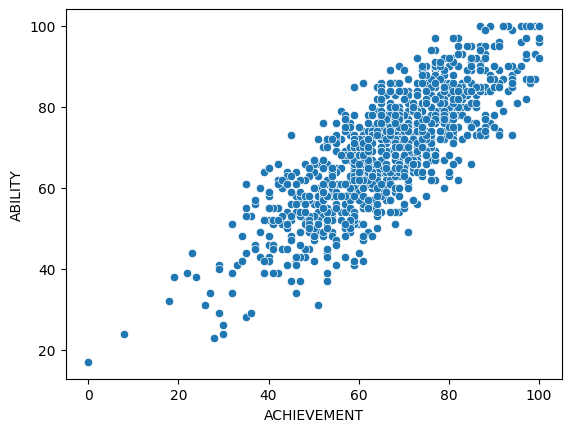

In [ ]:
sns.scatterplot(x="achievement".upper(),y="ability".upper(),data=df)
